In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
###variables :
drawing = False # is True when drawing else false
ref_point = []
ix,iy = -1,-1

###Function:
def setImageSize(img):
    scale_percent = 80 # percent of original size
    
    width = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)
    dim = (width, height)
    # resize image
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    return resized

def draw_rect(event,x,y,flags,param):
    global ref_point,drawing,ix,iy
    
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix,iy = x,y
        ref_point = [(x, y)]
        
    elif event == cv2.EVENT_LBUTTONUP:
        ref_point.append((x, y))
        drawing = False

        cv2.rectangle(draw,ref_point[0],ref_point[1],(0,255,0),2)
###show image:
img = cv2.imread('images/parking-3.jpg')
draw = img.copy()
#draw = setImageSize(draw)
cv2.namedWindow('mydrawing',cv2.WINDOW_NORMAL)
cv2.resizeWindow('resize',100,100)

cv2.setMouseCallback('mydrawing',draw_rect)

while True:
    cv2.imshow('mydrawing',draw)
    
    if cv2.waitKey(1) & 0xFF == 27:
        break
        
if len(ref_point) == 2:
        crop_img = img[ref_point[0][1]:ref_point[1][1], ref_point[0][0]:ref_point[1][0]]
        cv2.imwrite('crop_img.jpg',crop_img)

        
        
cv2.destroyAllWindows()

In [4]:
face = cv2.imread('images/crop_img.jpg')
full = cv2.imread('images/parking-3.jpg')

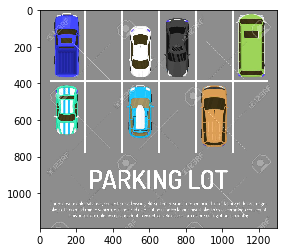

In [5]:
plt.imshow(full)

In [ ]:
# Showing part of image :

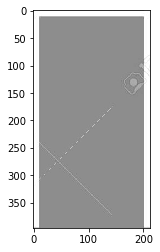

In [8]:
plt.imshow(face)

In [9]:
full.shape

(1191, 1300, 3)

In [10]:
face.shape

(396, 212, 3)

In [14]:
temp = full.copy()

In [15]:
temp = cv2.cvtColor(temp,cv2.COLOR_BGR2GRAY)

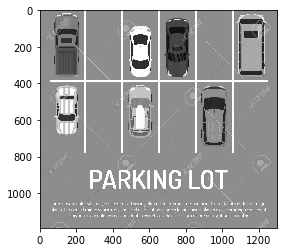

In [17]:
plt.imshow(temp,'gray')

In [19]:
img,contours,hierarchy = cv2.findContours(temp,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

In [20]:
type(contours)

list

In [21]:
type(hierarchy)

numpy.ndarray

In [23]:
hierarchy

array([[[-1, -1,  1, -1],
        [ 2, -1, -1,  0],
        [ 3,  1, -1,  0],
        [ 4,  2, -1,  0],
        [ 5,  3, -1,  0],
        [ 6,  4, -1,  0],
        [ 7,  5, -1,  0],
        [ 8,  6, -1,  0],
        [ 9,  7, -1,  0],
        [10,  8, -1,  0],
        [11,  9, -1,  0],
        [12, 10, -1,  0],
        [-1, 11, -1,  0]]], dtype=int32)

In [24]:
contours

[array([[[   0,    0]],
 
        [[   0, 1190]],
 
        [[1299, 1190]],
 
        [[1299,    0]]], dtype=int32),
 array([[[702, 244]],
 
        [[703, 243]],
 
        [[704, 244]],
 
        [[703, 245]]], dtype=int32),
 array([[[701, 241]],
 
        [[702, 240]],
 
        [[703, 241]],
 
        [[702, 242]]], dtype=int32),
 array([[[702, 240]],
 
        [[703, 239]],
 
        [[704, 240]],
 
        [[703, 241]]], dtype=int32),
 array([[[700, 238]],
 
        [[701, 237]],
 
        [[702, 238]],
 
        [[701, 239]]], dtype=int32),
 array([[[702, 236]],
 
        [[703, 235]],
 
        [[704, 236]],
 
        [[703, 237]]], dtype=int32),
 array([[[701, 234]],
 
        [[702, 233]],
 
        [[703, 234]],
 
        [[702, 235]]], dtype=int32),
 array([[[726, 216]],
 
        [[727, 215]],
 
        [[728, 216]],
 
        [[727, 217]]], dtype=int32),
 array([[[720, 216]],
 
        [[721, 215]],
 
        [[722, 216]],
 
        [[721, 217]]], dtype=int32),
 array([[[7

In [38]:
ret, thresh = cv2.threshold(temp,200,255,cv2.THRESH_BINARY)

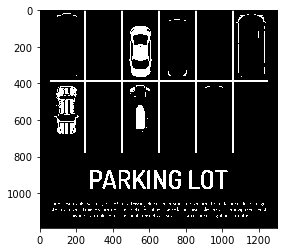

In [39]:
plt.imshow(thresh,'gray')

In [40]:
temp = thresh.copy()

In [41]:
# Edge Detection :

In [42]:
edges = cv2.Canny(temp,threshold1=127,threshold2=127)

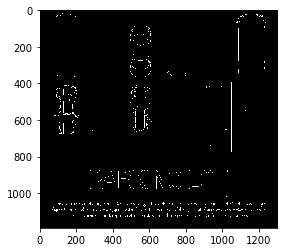

In [43]:
plt.imshow(edges,'gray')

In [44]:
blur_img = cv2.blur(temp,(5,5))

In [45]:
edges = cv2.Canny(temp,threshold1=127,threshold2=127)

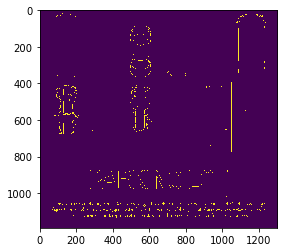

In [46]:
plt.imshow(edges)

In [47]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

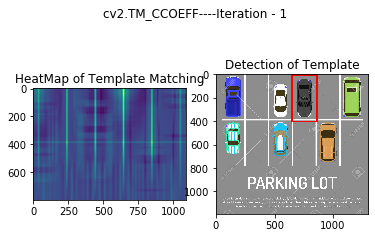

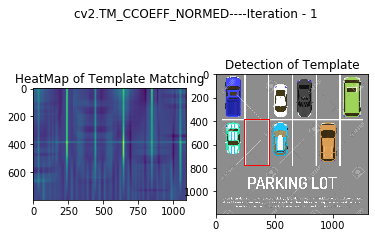

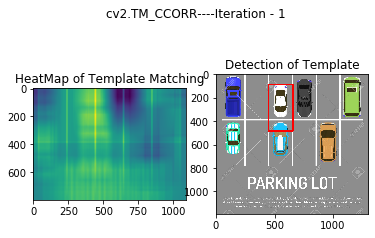

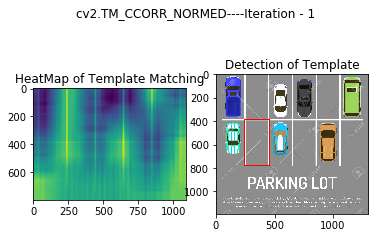

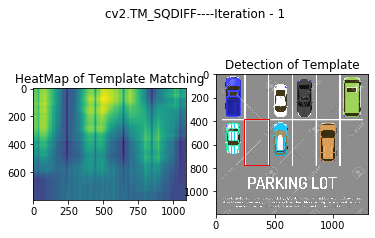

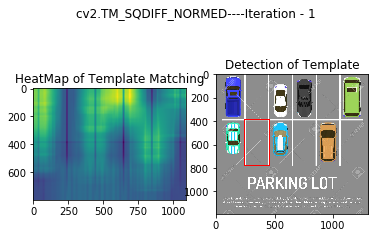

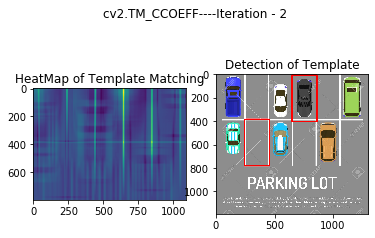

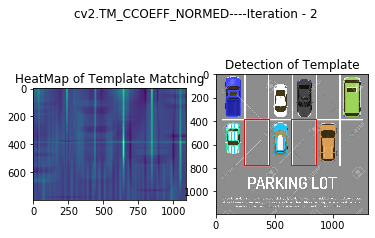

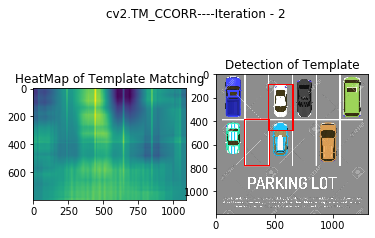

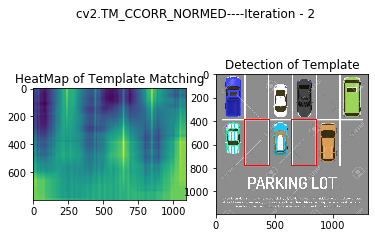

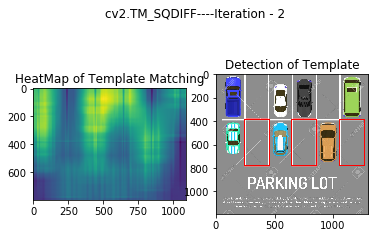

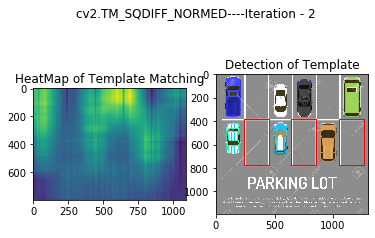

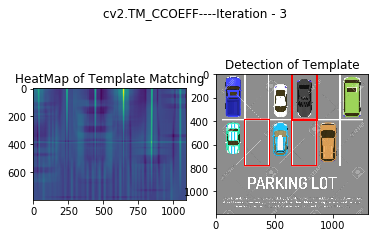

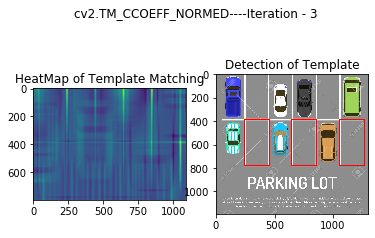

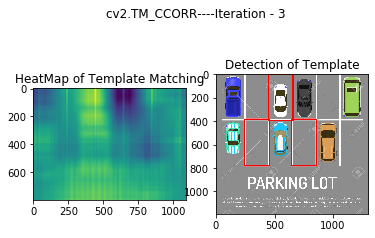

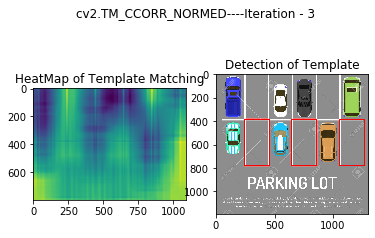

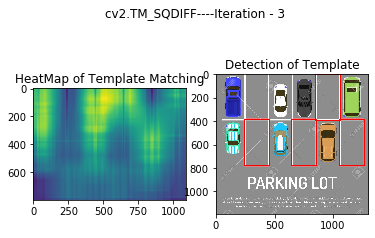

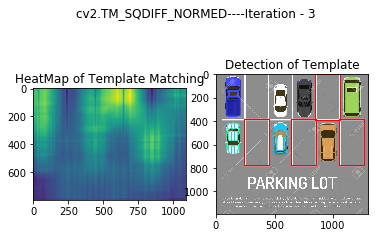

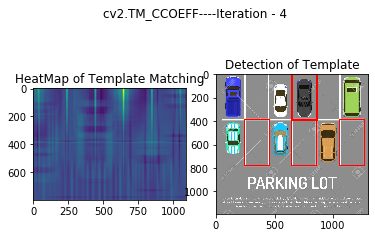

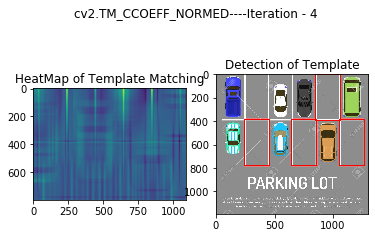

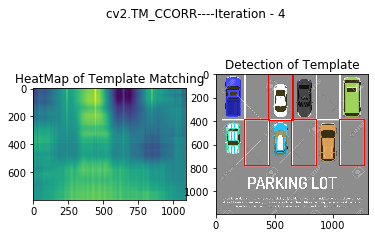

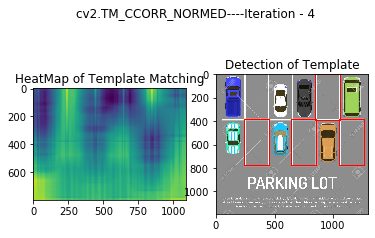

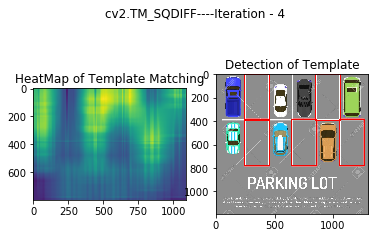

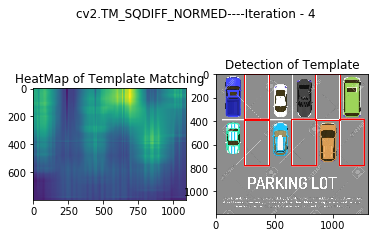

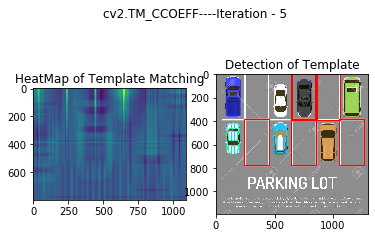

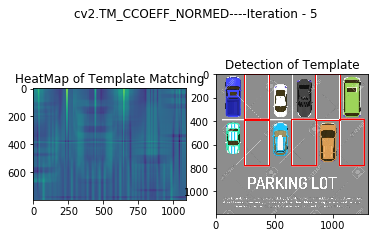

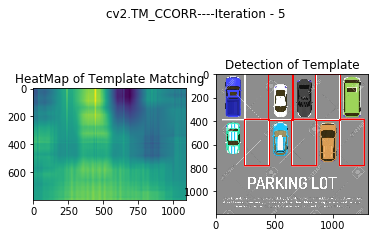

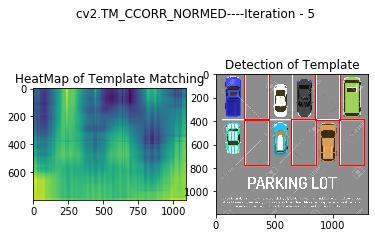

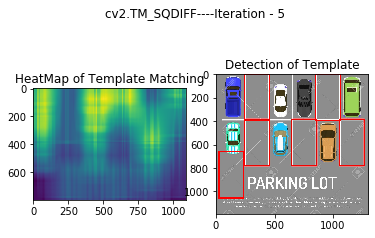

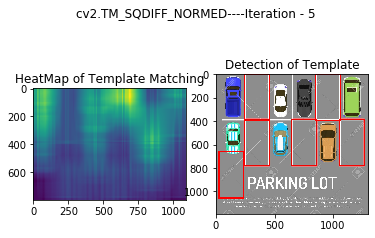

In [53]:
for i in range(5):
    for m in methods:
    
    #create a copy of a image
        if i == 0:
            full_copy = full.copy()
        else:
            full_copy = cv2.imread('images/pic.jpg')
    
        method = eval(m)
    
    #Template Matching :
        res = cv2.matchTemplate(full_copy,face,method) #Matches the template in actual image
    
        min_val,max_val,min_loc,max_loc = cv2.minMaxLoc(res) 

        if method in [cv2.TM_SQDIFF,cv2.TM_SQDIFF_NORMED]:
            top_left = min_loc #(y,x)
        else:
            top_left = max_loc
        
        ht,wdt,channels = face.shape
    
        bottom_right = (top_left[0]+wdt,top_left[1]+ht)
    
    
        cv2.rectangle(full_copy,top_left,bottom_right,(255,0,0),10)
        
        if method in [cv2.TM_CCORR_NORMED]:
            cv2.imwrite('images/pic.jpg',full_copy)
    
    #Plot and Show Images :
    
        plt.subplot(121)
        plt.imshow(res)
        plt.title('HeatMap of Template Matching')
    
        plt.subplot(122)
        plt.imshow(full_copy)
        plt.title('Detection of Template')
    
        #Title everything with method :
        
        plt.suptitle(m + "----Iteration - " + str(i+1))
    
        plt.show()
    
        print('\n')
        print('\n')
    
    
    
    
    

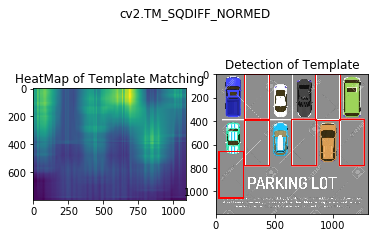

In [51]:

    plt.subplot(121)
    plt.imshow(res)
    plt.title('HeatMap of Template Matching')
    
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('Detection of Template')
    
    #Title everything with method :
    plt.suptitle(m)
    
    plt.show()
    
    print('\n')
    print('\n')
    
    
    

In [ ]:
#Explaantion of how method works :

In [25]:
my_method = eval('cv2.TM_CCOEFF')
res = cv2.matchTemplate(full,face,my_method)

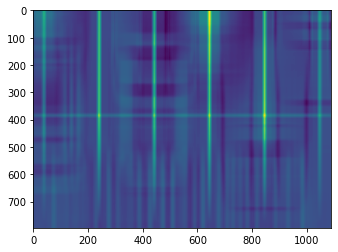

In [26]:
plt.imshow(res)

In [27]:
min_val,max_val,min_loc,max_loc = cv2.minMaxLoc(res)

In [28]:
print(min_val,' ',max_val,' ',min_loc,' ',max_loc)

-129736248.0   396234592.0   (485, 51)   (645, 8)
